**<h1><center>CS 464</center></h1>**
**<h1><center>Introduction to Machine Learning</center></h1>**
**<h1><center>Fall 2020</center></h1>**
**<h1><center>Homework 3</center></h1>**
<h4><center>Due: Jan 03, 2021 23:59 (GMT+3)</center></h4>

### Instructions

<ul>
    <li>
    This homework contains both written and programming questions about neural networks. You should implement programming questions on this notebook. Your plots should also be produced in this notebook. Each programming question has its own cell for your answer. You can implement your code directly in these cells, or you can call required functions which are defined in a different location for the given question.
    </li>
    <li>
    For questions that you need to plot, your plot results have to be included in the cell output. For written questions, you may provide them either as comments in code cells or as seperate text cells. 
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use different libraries than given libraries in the code segments of this homework except for libraries inclueded in Python Standard Library (https://docs.python.org/3/library/).
    </li>
    <li>
    You are <b>NOT ALLOWED</b> to use a different deep learning framework than PyTorch.
    </li>
    <li>
    While submitting the homework file, please package notebook(".ipynb") and model (".pth") files as a gzipped TAR file or a ZIP file with the name cs464_hw3_section#_Firstname_Lastname. Please do not use any Turkish letters for any of your files including code files and model files. Upload your homework to Moodle.
    </li>
    <li>
    This is an individual assignment for each student. That is, you are NOT allowed to share your work with your classmates.</li>
    <li> 
    If you do not follow the submission routes, deadlines and specifications, it will lead to a significant grade deduction.
    </li>
    <li> 
    If you have any questions, please contact "ilaydabeyreli@gmail.com" or "ilayda.beyreli@bilkent.edu.tr".
    </li>

</ul>

## Environment Setup

This homewrok is prepeared by using Google CoLab which already has required libraries. However, if you are using your own local Jupyter or any other Python notebook editor, you may use both anaconda or pip to install PyTorch to your own computer.

### Anaconda Installation

<ul>
    <li>Download anaconda from https://www.anaconda.com/download</li>
    <li>Follow the instructions provided in https://conda.io/docs/user-guide/install/index.html#regular-installation</li>
</ul>

#### Creation of Virtual Environment

<ul>
    <li>Create python3.7 virtual environment for your hw3 using follow command from the command line<br>
        <i>> conda create -n HW3 python=3.7 anaconda</i></li>
    <li>Activate your virtual environment<br>
        <i>> source activate HW3</i></li>
    <li>To install auxiliary libraries, replace the "package_name" in the following command and run it in activated "hw3" environment <br>
        <i>> pip install "pacakge_name"<i></li>
     <li>When you create your virtual environment with "anaconda" metapackage, jupyter notebook should be installed. Try:<br>
         <i>> jupyter notebook</i>
</ul>


#### Pytorch Installation with Anaconda

You should install PyTorch to your virtual environment which is created for the hw3. Therefore, you should activate your homework virtual environment before to start PyTorch installation.
<li>> source activate HW3</li>

After you have activated the virtual environment, then use one of the following commands to install pytorch for CPU for your system. See https://pytorch.org/ for help.
<ul>
<li>For MacOS:<br>
    <i>> conda install pytorch torchvision -c pytorch</i>
</li>
<li>For Linux:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i>
</li>
<li>For Windows:<br>
    <i>> conda install pytorch-cpu torchvision-cpu -c pytorch</i><br>
</li>

###Pip3 Installation
<ul>
    <li>Download pip3 from https://pip.pypa.io/en/stable/installing/</li>
    <li>If you are using Windows, you may need to add Python to your enviroment variables. You may use the following tutorial to install Python and pip.
    https://phoenixnap.com/kb/how-to-install-python-3-windows</li>
</ul>

#### PyTorch Installation with Pip
<ul>
<li>For MacOS:<br>
    <i>> pip3 install torch torchvision</i>
</li>
<li>For Linux:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i>
</li>
<li>For Windows:<br>
    <i>> pip3 install torch==1.3.1+cpu torchvision==0.4.2+cpu -f https://download.pytorch.org/whl/torch_stable.html</i><br>
</li>


##Question 1 [12 pts.]

Answer the given questions with **at most a sentence**.

  >a) What is one reason not to use the same data for both your training set and your testing set?<br>
In this case we would obtain a model that overfits the test dataset. It will kind of memorize the answers and give good result on current test data but might not work on other datasets. <br>

  >b) Why is it important for machine learning algorithms to have access to high-quality(large and accurate enough) data ?<br>
  This is because our algorithms are learning using this data if we dont have accurate data, model will learn wrong things and if data is small it would not be enough to learn.<br>

  >c) What is the main motivation for using activation functions in artificial neural networks (ANNs)?<br>
  Actication function helps model in learning complex data patterns. It uses input values and makes intermediate values which are then used to make output. Due to these intermediate values learning becomes easier.<br>

  >d) The activations for class A, B and C before softmax were 12, 7 and 4. What would be the softmax values for class A and class B?<br>
  The softmax values for A and B would be 12 and 7 respectiveely.<br>

  >e) What does it mean to underfit your data model?<br>
  The model is underfitting if it performs poorly on training dataset. This could mean model is not able to understand the relationship between input and output.<br>

  >f) Consider you have a 14 class classification problem. What would be the probability of random guess?<br>
  The probablity of correct answer would be 1/14 = 0.0714 <br>




##Question 2 [88 pts.]

Computer vision (CV) is the field of study that deals with how computers can gain high-level understanding from digital images or videos. Your task for this question is to classify cats according to their breeds by using simple machine learning algorithms developed for CV problems on cat images.

Your dataset consist of XXX cat images from 15 breeds. Images of each breed is stored under separate folders in the compressed file given to you.  The dataset has been processed in such a way that each class has approximately 1900 samples.

Download the dataset from the following link:
<br>
https://drive.google.com/.....
<br>

Libraries that are required in this question is given in the following code cell.

In [1]:
###########
#answers to questions are given in same text cell as the questions
###########

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')
# PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
# To Read Data
from torch.utils.data import Dataset, DataLoader
import numpy as np
from PIL import Image
# To Interpret results & obtain plots
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score
import matplotlib.pyplot as plt
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/cs464_hw3.zip', 'r') as zipObj:
  zipObj.extractall()
# You could add your own libraries form Python Standard Library in this cell. Any other external libraries are not allowed.

Mounted at /content/drive


### Data Loader [8 pts.]

An important part of such a task is to implement your own data loader. In this homework, a partial loader is provided to you. This loader is going to be based on a base class named "Dataset", provided in PyTorch library. You need to complete the code below to create your custom "CatsDataset" class which will be able to load your dataset. Implement the functions whose proptotypes are given. Follow the TODO notes below. You have to divide the files into three sets as <b>train (70%)</b>, 
<b>validation (10%)</b> and **test (20%)** sets.  These non-overlapping splits, which are subsets of CatsDataset, should be retrieved using the "get_dataset" function. Since this data loader will be called to get the input for different models, your function should work in a least two modes:
1. To be compatible with MLP, you need to resize the image to 64x64x3 to have consistent input size for all images. Then, you should convert your image to grayscale and flatten it into a vector. Note that the pixel values also needs to be normalized to [0,1] range.
<br>
2. To be compatible with CNN, you need to resize the image to 64x64x3 to have consistent input size for all images. Note that, you **should not** flatten the image or convert it to grayscale in this mode, i.e. all channels of the images should be included and each image should be stored as a matrix.

Hint: The dataset is not normalized and your results will heavily depend on your input.

In [2]:


class CatsDataset(Dataset):
    # TODO:
    # Define constructor for SVHNDataset class
    # HINT: You can pass processed data samples and their ground truth values as parameters 
    def __init__(self, data, labels): # you are free to change parameters
        self.data = torch.FloatTensor(data.astype('float')).cuda()
        self.labels = torch.FloatTensor(labels.astype('int')).cuda()
        #self.data = data
        #self.labels = labels
    '''This function should return sample count in the dataset'''
    def __len__(self):
        return self.data.shape[0]

    '''This function should return a single sample and its ground truth value from the dataset corresponding to index parameter '''
    def __getitem__(self, index):
        return self.data[index,:], self.labels[index]




In [3]:
import os
from  sklearn.utils import shuffle
import cv2

#mode 0 for CNN mode 1 for MLP
def get_dataset(root, mode):
#root = "data"
#mode = 1
  lab = 0
  processed_data = []
  processed_labels = []
  for filename in os.listdir(root):
    for newname in os.listdir(os.path.join(root,filename)):
      img = np.array(Image.open(os.path.join(root, os.path.join(filename, newname))))
      img = cv2.resize(img, (64,64)) 
      if mode == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.flatten().reshape(4096,)
      img = img/255
      
      processed_data.append(img)
      processed_labels.append(lab)
    lab+=1


  processed_data, processed_labels = shuffle(processed_data, processed_labels)
  train_dataset = processed_data[:int((np.array(processed_data).shape[0]*7)/10)]
  val_dataset = processed_data[int((np.array(processed_data).shape[0]*7)/10):int((np.array(processed_data).shape[0]*8)/10)] 
  test_dataset = processed_data[int((np.array(processed_data).shape[0]*8)/10):]
  train_labels = processed_labels[:int((np.array(processed_labels).shape[0]*7)/10)]
  val_labels = processed_labels[int((np.array(processed_labels).shape[0]*7)/10):int((np.array(processed_labels).shape[0]*8)/10)]
  test_labels = processed_labels[int((np.array(processed_labels).shape[0]*8)/10):]

  return train_dataset, val_dataset, test_dataset, train_labels, val_labels, test_labels
    



      




    # TODO: 
    # Read dataset files
    # Resize images as 64x64 so that you have consistent data. You can use img.resize((64,64)) from PIL.Image.
    # Construct training, validation and test sets
    # Normalize datasets
    
    #return train_dataset, val_dataset, test_dataset#



#train_dataset, val_dataset, test_dataset = get_dataset("data",)

###Model Implementations [10 pts.]

#### Multi Layer Perceptron [5 pts.]
Now, implement your three layer neural network. (Input+hidden1+hidden2) FNet class will represent your neural network. The first hidden layer will contain 2048 neurons, and the second will have 1024 neurons. You will decide the number of input and output neurons. Use ReLU as your hidden layer activation function. You need to pick a proper activation function for the output layer.

In [4]:
class FNet(nn.Module):
    '''Define your neural network'''
    def __init__(self, Isize, Osize): 
      super(FNet, self).__init__()
      self.Hlayer1 = 2048
      self.Hlayer2 = 1024
      self.inpL = Isize
      self.outL = Osize
      self.hidden_layer1 = nn.Linear(self.inpL, self.Hlayer1)
      self.hidden_layer2 = nn.Linear(self.Hlayer1, self.Hlayer2)
      self.output_layer = nn.Linear(self.Hlayer2, self.outL)
    # you can add any additional parameters you want 
    # TODO:
    # You should create your neural network here

     
    def forward(self, X): 
      X = F.relu(self.hidden_layer1(X))
      X = F.relu(self.hidden_layer2(X))
      return torch.softmax(self.output_layer(X), dim=1)
    # you can add any additional parameters you want
    # TODO:
    # Forward propagation implementation should be here

#### Convolutional Neural Network [5 pts]

Now implement your CNN. ConvNet class will represent your convolutional neural network. Implement 4 layers of convolution: 
<ul>
    <li>(1) 8 filters with size of 3 x 3 with stride 1 and no padding, (2) ReLU </li>
    <li>(3) 16 filters with size of 3 x 3 with stride 1 and no padding, (4) ReLU and (5) MaxPool 2 x 2 </li>
    <li>(6) 32 filters with size of 5 x 5 with stride 1 and padding 1, (7) ReLU and (8) MaxPool 2 x 2 </li> 
    <li>(9) 32 filters with size of 5 x 5 with stride 1 and padding 1, (10) ReLU and (11) MaxPool 2 x 2 </li> 
</ul>

As the classifier layer, you need to add only one linear layer at the end of the network. You need to choose the appropriate input and output neuron sizes and the activation function for the dense layer.

In [5]:
class ConvNet(nn.Module):
    '''Define your neural network'''
    def __init__(self): # you can add any additional parameters you want 
      super(ConvNet, self).__init__()
      self.conv1 = nn.Conv2d(in_channels=3,out_channels=8,stride=1,padding=0,kernel_size=3)
      self.conv2 = nn.Conv2d(in_channels=8,out_channels=16,stride=1,padding=0,kernel_size=3)
      self.conv3 = nn.Conv2d(in_channels=16,out_channels=32,stride=1,padding=0,kernel_size=5)
      self.conv4 = nn.Conv2d(in_channels=32,out_channels=32,stride=1,padding=0,kernel_size=5)
      self.mp = nn.MaxPool2d(2)
      self.fc = nn.Linear(512, 13)
    # TODO:
    # You should create your neural network here

     
    def forward(self, X): # you can add any additional parameters you want
      in_size = X.size(0)
      X = F.relu(self.conv1(X))
      X = F.relu(self.mp(self.conv2(X)))
      X = F.relu(self.mp(self.conv3(X)))
      X = F.relu(self.mp(self.conv4(X)))
      #(print(X.size()))
      X = torch.flatten(X, start_dim=1)  # flatten the tensor
      #(print(X.size()))
      X = self.fc(X)
      #(print(X.size()))
      return torch.softmax(X,dim=1)
      #return F.softmax(X)
    # TODO:
    # Forward propagation implementation should be here

###Stochastic Gradient Descent [35 pts.]

####Training with SGD [20 pts.]

Train both models up to 700 epochs with properly processed inputs, i.e. call your "get_dataset" function in mode "1" for MLP and mode "2" for CNN. Use SGD as your optimizer. Tune your learning rate, weight decay. Take momentum as $0$ Save your best models, i.e. MLP and CNN models with highest performance, as "best_mlp_sgd.pth" and "best_cnn_sgd.pth". The best model decision is up to you. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures for each model:
1. training loss and validation loss vs. epoch
2. validation acuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

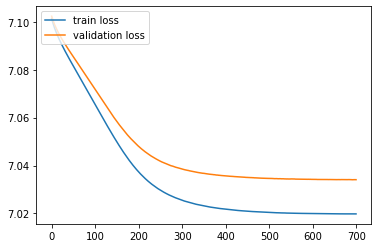

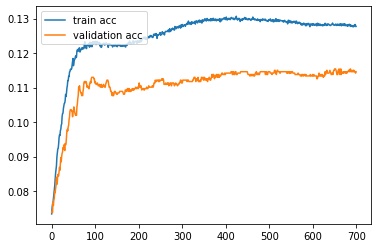

In [39]:
#for the selection of best model, we used accuracy of the validation set. The reason for that 
#it gives us highest accuracy and as data is shuffeled we expect to have similar data everywhere.
#therefore we expect similar accuracy on test set.

# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
max_epoch = 700 
train_batch = 32
test_batch = 32
learning_rate = 0.005

use_gpu = torch.cuda.is_available()

train_dataset, val_dataset, test_dataset, train_labels, val_labels, test_labels = get_dataset("data", 1)
# Create train dataset loader
train_dataset = np.array(train_dataset)
train_labels = np.array(train_labels)
test_dataset = np.array(test_dataset)
test_labels = np.array(test_labels)
val_dataset = np.array(val_dataset)
val_labels = np.array(val_labels)
train_data = CatsDataset(train_dataset, train_labels)
trainloader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
# Create validation dataset loader
valid_data = CatsDataset(val_dataset, val_labels)
val_loader = DataLoader(valid_data, batch_size=test_batch)
# Create test dataset loader
test_data = CatsDataset(test_dataset, test_labels)
testloader = DataLoader(test_data, batch_size=test_batch)

# initialize your network
model = FNet(train_dataset.shape[1],13) 
if use_gpu:
  model.cuda()
# define your loss function
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate,momentum=0, weight_decay=5e-04) # you can play with  weight_decay as well
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
lLoss = 0
FinalLossTrain=[]
FinalLossValid=[]
FinalAccTrain=[]
FinalAccValid=[]
check_for = 0
for epoch in range(max_epoch):
  ###############################################333
  model=model.train()
  j=0
  lossez = np.zeros(train_data.__len__())
  predicteds=[]
  actuals = []
  for batch_idx, (data, labels) in enumerate(trainloader):
    if use_gpu:
      data = data.cuda()
    optimizer.zero_grad()
    y_pred = model(data)
    predicted = np.array((y_pred).cpu().detach())
    for x in predicted:
      predicteds.append(np.argmax(x))

    one_hot = torch.nn.functional.one_hot(labels.to(torch.int64),13)
    loss  = criterion(y_pred, one_hot.to(torch.float))
    #loss  = criterion(y_pred, labels.unsqueeze(1))
    
    loss.backward()
    optimizer.step()
    
    actual = np.array(labels[:].unsqueeze(1).cpu().detach())
    
    kia = 0
    nahi = 0
    for kuch in actual:     
      if actual[kia] == np.argmax(predicted[kia]):
        nahi += 1
      kia += 1
    accuracies = nahi/kia
    losses = np.mean(np.array(loss.cpu().detach()))
    
    
    for x in actual:
      actuals.append(x)
    
    #lossez[j*train_batch:(j+1)*train_batch] = (np.array(criterion(y_pred, labels.unsqueeze(1)).cpu().detach()))
    lossez[j*train_batch:(j+1)*train_batch] = losses
    
    j=j+1 

  kia = 0
  nahi = 0
  #print(lossez)
  for kuch in actuals:
    if actuals[kia][0] == predicteds[kia]:
      nahi += 1
    kia += 1
  acc = nahi/kia

  #print("iteration end: ", check_for," acc: ", acc*100)
  ########################################################
#    iterate over training batches
#    ...

#    Validation
  model = model.eval()
  criterions = nn.MSELoss()
  lossezV = np.zeros(valid_data.__len__())
  predictedsV=[]
  actualsV = []
  j=0
  with torch.no_grad():
    for batch_idx, (data, labels) in enumerate(val_loader):
      #print(labels)
      y_pred = (model(data))
      predicted =np.array((y_pred).cpu().detach())
      actual = np.array(labels[:].unsqueeze(1).cpu().detach())
      for x in predicted:
        predictedsV.append(np.argmax(x))
      for x in actual:
        actualsV.append(x)
      
      #lossezV[j*test_batch:(j+1)*test_batch] = (np.array(criterions(y_pred, labels.unsqueeze(1)).cpu().detach()))
      one_hotV = torch.nn.functional.one_hot(labels.to(torch.int64),13)
      lossV  = criterion(y_pred, one_hotV.to(torch.float))
      lossesV = np.mean(np.array(lossV.cpu().detach()))
      lossezV[j*train_batch:(j+1)*train_batch] = lossesV
      j=j+1   
      kia = 0
      nahi = 0
      
      for kuch in actual:
        if actual[kia] == np.argmax(predicted[kia]):
          nahi += 1
        kia += 1
      accuracies = nahi/kia
    
    kia = 0
    nahi = 0
    
    for kuch in actualsV:
      if actualsV[kia][0] == predictedsV[kia]:
        nahi += 1
      kia += 1
    accV = nahi/kia
    

  FinalLossTrain.append(np.mean(lossez)*100)
  FinalLossValid.append(np.mean(lossezV)*100)
  FinalAccTrain.append(acc)
  FinalAccValid.append(accV)
#     iterate over validation batches
  if accV > lLoss:
    torch.save(model, 'best_path.pth')
    lLoss = accV

  
  #print("iteration end: ", check_for," accV: ", accV*100)
  check_for += 1
# plot losses vs epoch 
# ...
# plt.show()
plt.figure()
plt.plot(FinalLossTrain, label='train loss')
plt.plot(FinalLossValid, label='validation loss')
plt.legend(loc="upper left")
#print(FinalLossTrain)
#print(FinalLossValid)
# plot accuracies vs epoch
# ...
# plt.show()
plt.figure()
plt.plot(FinalAccTrain, label='train acc')
plt.plot(FinalAccValid, label='validation acc')
plt.legend(loc="upper left")


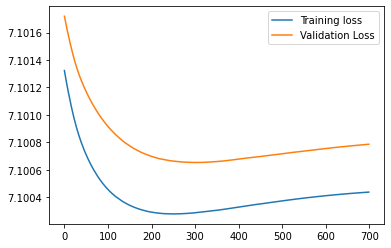

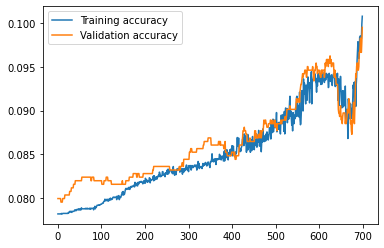

In [41]:
# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
max_epoch = 700
train_batch = 32
test_batch = 32
learning_rate = 0.005

use_gpu = torch.cuda.is_available()

train_dataset, val_dataset, test_dataset, train_labels, val_labels, test_labels = get_dataset("data", 2)
# Create train dataset loader
train_dataset = np.array(train_dataset)
train_labels = np.array(train_labels)
test_dataset = np.array(test_dataset)
test_labels = np.array(test_labels)
val_dataset = np.array(val_dataset)
val_labels = np.array(val_labels)
train_data = CatsDataset(train_dataset, train_labels)
trainloader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
# Create validation dataset loader
valid_data = CatsDataset(val_dataset, val_labels)
val_loader = DataLoader(valid_data, batch_size=test_batch)
# Create test dataset loader
test_data = CatsDataset(test_dataset, test_labels)
testloader = DataLoader(test_data, batch_size=test_batch)

# initialize your network
model = ConvNet()
if use_gpu:
  model.cuda()

# define your loss function
criterion = nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with  weight_decay as well
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance

lLoss = 0
FinalLossTrain=[]
FinalLossValid=[]
FinalAccTrain=[]
FinalAccValid=[]
check_for = 0
for epoch in range(max_epoch):
  #print("iteration start: ", check_for)
  ###############################################333
  model=model.train()
  j=0
  
  lossez = np.zeros(train_data.__len__())
  predicteds=[]
  actuals = []
  for batch_idx, (data, labels) in enumerate(trainloader):
    
    if use_gpu:
      data = data.cuda()
    optimizer.zero_grad()
    y_pred = model(data.permute(0, 3, 1, 2))
    #y_pred = torch.max(y_pred)

    one_hot = torch.nn.functional.one_hot(labels.to(torch.int64),13)
    loss  = criterion(y_pred, one_hot.to(torch.float))
    #loss  = criterion(y_pred, labels.unsqueeze(1))

    loss.backward()
    optimizer.step()
    predicted = np.array((y_pred).cpu().detach())
    actual = np.array(labels[:].unsqueeze(1).cpu().detach())
    
    kia = 0
    nahi = 0
    
    for kuch in actual:     
      if actual[kia] == np.argmax(predicted[kia]):
        nahi += 1
      kia += 1
    accuracies = nahi/kia
    losses = np.mean(np.array(loss.cpu().detach()))
    
    for x in predicted:
      predicteds.append(np.argmax(x))
    for x in actual:
      actuals.append(x)
    
    #lossez[j*train_batch:(j+1)*train_batch] = (np.array(criterion(y_pred, labels.unsqueeze(1)).cpu().detach()))
    lossez[j*train_batch:(j+1)*train_batch] = losses
    j=j+1 

  kia = 0
  nahi = 0
  #print(lossez)
  for kuch in actuals:
    if actuals[kia][0] == predicteds[kia]:
      nahi += 1
    kia += 1
  acc = nahi/kia

  #print("iteration end: ", check_for," acc: ", acc*100)
  ########################################################
#    iterate over training batches
#    ...

#    Validation
  model = model.eval()
  criterions = nn.MSELoss()
  lossezV = np.zeros(valid_data.__len__())
  predictedsV=[]
  actualsV = []
  j=0
  with torch.no_grad():
    for batch_idx, (data, labels) in enumerate(val_loader):
      #print(labels)
      y_pred = model(data.permute(0, 3, 1, 2))
      predicted =np.array((y_pred).cpu().detach())
      actual = np.array(labels[:].unsqueeze(1).cpu().detach())
      for x in predicted:
        predictedsV.append(np.argmax(x))
      for x in actual:
        actualsV.append(x)
      

      one_hotV = torch.nn.functional.one_hot(labels.to(torch.int64),13)
      lossV  = criterion(y_pred, one_hotV.to(torch.float))
      lossesV = np.mean(np.array(lossV.cpu().detach()))
      lossezV[j*train_batch:(j+1)*train_batch] = lossesV

      #lossezV[j*train_batch:(j+1)*train_batch] = (np.array(criterion(y_pred, labels.unsqueeze(1)).cpu().detach()))
      j=j+1   
      kia = 0
      nahi = 0
      
      for kuch in actual:
        if actual[kia] == np.argmax(predicted[kia]):
          nahi += 1
        kia += 1
      accuracies = nahi/kia
    
    kia = 0
    nahi = 0
    
    for kuch in actualsV:
      if actualsV[kia][0] == predictedsV[kia]:
        nahi += 1
      kia += 1
    accV = nahi/kia

  FinalLossTrain.append(np.mean(lossez)*100)
  FinalLossValid.append(np.mean(lossezV)*100)
  FinalAccTrain.append(acc)
  FinalAccValid.append(accV)
#     iterate over validation batches
  if accV > lLoss:
    torch.save(model, 'best_path_cnn.pth')
    lLoss = accV

  
  #print("iteration end: ", check_for," accV: ", accV*100)
  check_for += 1
# plot losses vs epoch 
# ...
# plt.show()
plt.figure()
plt.plot(FinalLossTrain, label='train loss')
plt.plot(FinalLossValid, label='validation loss')
plt.legend(['Training loss', 'Validation Loss'],fontsize=10)
#print(FinalLossTrain)
#print(FinalLossValid)
# plot accuracies vs epoch
# ...
# plt.show()
plt.figure()
plt.plot(FinalAccTrain, label='train acc')
plt.plot(FinalAccValid, label='validation acc')
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=10)

# for epoch in range(max_epoch):
#    model=model.train()
#    iterate over training batches
#    ...

#    Validation
#    model = model.eval()
#    with torch.no_grad():
#     iterate over validation batches
#    if ???????:
#       torch.save(model, best_path)

# plot losses vs epoch 
# ...
# plt.show()

# plot accuracies vs epoch
# ...
# plt.show()


####Test with SGD [15 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **models**. Which one is more preferable? Why?

We observe that for both of our models our accuracies increase and our losses decrease as iterations increase, and our model is trained. Plots show that neither of our models were underfitting or over fitting. For MLP we are having 2 hidden layers while for CNN we have 4 convolution layers. We use MSELoss function for both models and for both optimizers as well. The reason for that is because from the different Loss functions that were checked on dataset it was performing best. Now we observe that the accuracy is higher for MLP implementation as compared to CNN implementation. Now we see the results, we come to know that all of precision, recall and F1 score are higher for MLP as compared to CNN. However,  Heatmaps for both models show similar structures. Furthermore, CNN takes more time for training as compared to MLP model. Therefore it is indicated by all of the metrics that MLP model is performing better as compared to CNN model. Therefore it is better to use MLP model.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean Loss: 0.07023681560635688 
Mean Acc: 11.783893985728849 
Mean Macro Precision: 6.730272408450332 
Mean Macro Recall: 12.055530554562699 
Mean Macro F1 Score: 5.795633619188223


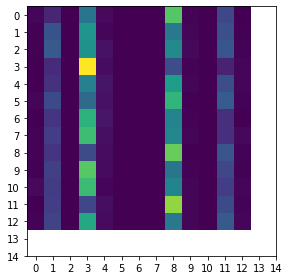

In [40]:
# Test MLP
# load best model
best_path = "best_path.pth"
model = torch.load(best_path)

# evaluate on test set
model = model.eval()

criterions = nn.MSELoss()
lossezZ = np.zeros(test_data.__len__())
predictedsZ=[]
actualsZ = []
j=0
with torch.no_grad():
  for batch_idx, (data, labels) in enumerate(testloader):
    #print(labels)
    y_pred = (model(data))
    predicted =np.array((y_pred).cpu().detach())
    actual = np.array(labels[:].unsqueeze(1).cpu().detach())
    for x in predicted:
      predictedsZ.append(np.argmax(x))
    for x in actual:
      actualsZ.append(x)
    
    #lossezZ.append(np.array(criterions(y_pred, labels.unsqueeze(1)).cpu().detach()))
    one_hotZ = torch.nn.functional.one_hot(labels.to(torch.int64),13)
    lossZ  = criterion(y_pred, one_hotZ.to(torch.float))
    lossesZ = np.mean(np.array(lossZ.cpu().detach()))
    lossezZ[j*train_batch:(j+1)*train_batch] = lossesZ
    j=j+1   
    kia = 0
    nahi = 0
    
    for kuch in actual:
      if actual[kia] == np.argmax(predicted[kia]):
        nahi += 1
      kia += 1
    accuracies = nahi/kia
  
  kia = 0
  nahi = 0
  
  for kuch in actualsZ:
    if actualsZ[kia][0] == predictedsZ[kia]:
      nahi += 1
    kia += 1
  accZ = nahi/kia

  
  conf_matrix = (confusion_matrix(actualsZ, predictedsZ))
  acc = accuracy_score(actualsZ, predictedsZ) *100
  pre = precision_score(actualsZ, predictedsZ,average='macro') *100
  recall = recall_score(actualsZ, predictedsZ,average='macro') *100
  f1 = f1_score(actualsZ, predictedsZ,average='macro') *100
  lossesd = np.mean(lossezZ)
  #print(metrics.classification_report(actualsZ, predictedsZ, digits=3))
  # print("confusion matrix: ",dd)
  # print("f1 score: ",f1_score(actualsZ, predictedsZ,average='macro') *100) 
  # print("macro prescion: ",precision_score(actualsZ, predictedsZ,average='macro') *100)
  # print("macro recall: ",recall_score(actualsZ, predictedsZ,average='macro') *100)
  # print("accuracy: ",accuracy_score(actualsZ, predictedsZ) *100)
  #print("nahi",nahi)
  #print("loader len",val_loader.__len__())
  #print("act",actualsV)
  #print("pre",predictedsV)
  
#   iterate over test batches
#   get confusion matrix
#   calculate accuracy
#   calculate precision
#   calculate recall
#   calculate F1 score

# print metrics
print("Mean Loss:", lossesd, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(15))
ax.set_yticks(np.arange(15))

fig.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean Loss: 0.07100901471851555 
Mean Acc: 9.908256880733946 
Mean Macro Precision: 2.308052219154088 
Mean Macro Recall: 10.20255897022246 
Mean Macro F1 Score: 3.1358827449841566


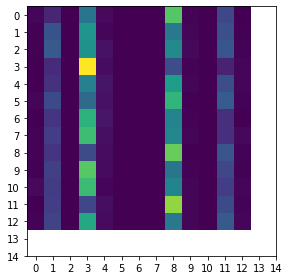

In [42]:
# Test CNN
# load best model
best_path = "best_path_cnn.pth"
model = torch.load(best_path)

# evaluate on test set
# model = model.eval()
model = model.eval()

criterions = nn.MSELoss()
lossezZZ = np.zeros(test_data.__len__())
predictedsZZ=[]
actualsZZ = []
j=0
with torch.no_grad():
  for batch_idx, (data, labels) in enumerate(testloader):
    #print(labels)
    y_pred = model(data.permute(0, 3, 1, 2))
    predicted =np.array((y_pred).cpu().detach())
    actual = np.array(labels[:].unsqueeze(1).cpu().detach())
    for x in predicted:
      predictedsZZ.append(np.argmax(x))
    for x in actual:
      actualsZZ.append(x)
    #print("y_p: ",y_pred.cpu().detach())
    #print("predicted: ",predicted)
    
    # print(criterions(y_pred, labels.unsqueeze(1)))
    
    #lossezZZ.append(np.array(criterions(y_pred, labels.unsqueeze(1)).cpu().detach()))
    one_hotZZ = torch.nn.functional.one_hot(labels.to(torch.int64),13)
    lossZZ  = criterion(y_pred, one_hotZZ.to(torch.float))
    lossesZZ = np.mean(np.array(lossZZ.cpu().detach()))
    lossezZZ[j*train_batch:(j+1)*train_batch] = lossesZZ
    
    j=j+1   
    kia = 0
    nahi = 0
    
    for kuch in actual:
      if actual[kia] == np.argmax(predicted[kia]):
        nahi += 1
      kia += 1
    accuracies = nahi/kia
  
  kia = 0
  nahi = 0
  
  for kuch in actualsZZ:
    if actualsZZ[kia][0] == predictedsZZ[kia]:
      #print("act: ",actualsV[kia][0])
      #print("pre: ",predictedsV[kia][0])
      nahi += 1
    #print("-----------------")
    kia += 1
  accZZ = nahi/kia
  #print("accuracy ",accZZ*100)
  dd = (confusion_matrix(actualsZZ, predictedsZZ))
  acc = accuracy_score(actualsZZ, predictedsZZ) *100
  pre = precision_score(actualsZZ, predictedsZZ,average='macro') *100
  recall = recall_score(actualsZZ, predictedsZZ,average='macro') *100
  f1 = f1_score(actualsZZ, predictedsZZ,average='macro') *100
  lossesd = np.mean(lossezZZ)
  # print(metrics.classification_report(actualsZ, predictedsZ, digits=3))
  # print("confusion matrix: ",dd)
  # print("f1 score: ",f1_score(actualsZ, predictedsZ,average='macro') *100) 
  # print("macro prescion: ",precision_score(actualsZ, predictedsZ,average='macro') *100)
  # print("macro recall: ",recall_score(actualsZ, predictedsZ,average='macro') *100)
  # print("accuracy: ",accuracy_score(actualsZ, predictedsZ) *100)
#   iterate over test batches
#   get confusion matrix
#   calculate accuracy
#   calculate precision
#   calculate recall
#   calculate F1 score

# print metrics
print("Mean Loss:", lossesd, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
#We want to show all ticks...
ax.set_xticks(np.arange(15))
ax.set_yticks(np.arange(15))

fig.tight_layout()
plt.show()

###Adam Optimizer [35 pts.]

Adam is an adaptive learning rate optimization algorithm that has been designed specifically for training deep neural networks. It was presented by Diederik Kingma from OpenAI and Jimmy Ba from the University of Toronto in their 2015 ICLR paper (poster) titled “Adam: A Method for Stochastic Optimization“.

Nowadays, most of machine learning frameworks, including tensorflow, Pytorch, and Keras, choose Adam as the default optimizer. In this question, you will experiment with it and try to understand why it replaced SGD as the default optimizer.

####Training with ADAM [20 pts.]

Train both models up to 700 epochs with properly processed inputs, i.e. call your "get_dataset" function in mode "1" for MLP and mode "2" for CNN. This time use Adam Optimizer as your optimizer. Tune your learning rate, weight decay. Save your best models, i.e. MLP and CNN models with highest performance, as "best_mlp_adam.pth" and "best_cnn_adam.pth". The best model decision is up to you. You could use any measurement and/or metric to decide on the best model for each network. However, you must explain your reasoning in your choice.

During training, you need to plot two figures for each model:
1. training loss and validation loss vs. epoch
2. validation acuracy and validation accuracy vs. epoch <br>

Name your axes and plots properly.

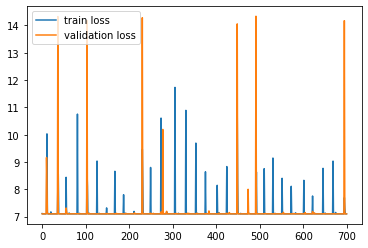

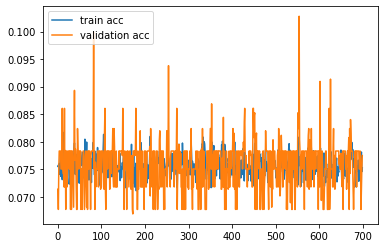

In [70]:
#for the selection of best model, we used accuracy of the validation set. The reason for that 
#it gives us highest accuracy and as data is shuffeled we expect to have similar data everywhere.
#therefore we expect similar accuracy on test set.

# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
max_epoch = 700
train_batch = 32
test_batch = 32
learning_rate = 0.001

use_gpu = torch.cuda.is_available()

train_dataset, val_dataset, test_dataset, train_labels, val_labels, test_labels = get_dataset("data", 1)
# Create train dataset loader
train_dataset = np.array(train_dataset)
train_labels = np.array(train_labels)
test_dataset = np.array(test_dataset)
test_labels = np.array(test_labels)
val_dataset = np.array(val_dataset)
val_labels = np.array(val_labels)
train_data = CatsDataset(train_dataset, train_labels)
trainloader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
# Create validation dataset loader
valid_data = CatsDataset(val_dataset, val_labels)
val_loader = DataLoader(valid_data, batch_size=test_batch)
# Create test dataset loader
test_data = CatsDataset(test_dataset, test_labels)
testloader = DataLoader(test_data, batch_size=test_batch)


# initialize your network
model = FNet(train_dataset.shape[1],13) 
if use_gpu:
  model.cuda()
# define your loss function
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-04) # you can play with  weight_decay as well
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance
lLoss = 0
FinalLossTrain=[]
FinalLossValid=[]
FinalAccTrain=[]
FinalAccValid=[]
check_for = 0
for epoch in range(max_epoch):
  ###############################################333
  model=model.train()
  j=0
  lossez = np.zeros(train_data.__len__())
  predicteds=[]
  actuals = []
  for batch_idx, (data, labels) in enumerate(trainloader):
    if use_gpu:
      data = data.cuda()
    optimizer.zero_grad()
    y_pred = model(data)
    predicted = np.array((y_pred).cpu().detach())
    for x in predicted:
      predicteds.append(np.argmax(x))

    one_hot = torch.nn.functional.one_hot(labels.to(torch.int64),13)
    loss  = criterion(y_pred, one_hot.to(torch.float))
    #loss  = criterion(y_pred, labels.unsqueeze(1))
    
    loss.backward()
    optimizer.step()
    
    actual = np.array(labels[:].unsqueeze(1).cpu().detach())
    
    kia = 0
    nahi = 0
    for kuch in actual:     
      if actual[kia] == np.argmax(predicted[kia]):
        nahi += 1
      kia += 1
    accuracies = nahi/kia
    losses = np.mean(np.array(loss.cpu().detach()))
    
    
    for x in actual:
      actuals.append(x)
    
    #lossez[j*train_batch:(j+1)*train_batch] = (np.array(criterion(y_pred, labels.unsqueeze(1)).cpu().detach()))
    lossez[j*train_batch:(j+1)*train_batch] = losses
    
    j=j+1 

  kia = 0
  nahi = 0
  #print(lossez)
  for kuch in actuals:
    if actuals[kia][0] == predicteds[kia]:
      nahi += 1
    kia += 1
  acc = nahi/kia

  #print("iteration end: ", check_for," acc: ", acc*100)
  ########################################################
#    iterate over training batches
#    ...

#    Validation
  model = model.eval()
  criterions = nn.MSELoss()
  lossezV = np.zeros(valid_data.__len__())
  predictedsV=[]
  actualsV = []
  j=0
  with torch.no_grad():
    for batch_idx, (data, labels) in enumerate(val_loader):
      #print(labels)
      y_pred = (model(data))
      predicted =np.array((y_pred).cpu().detach())
      actual = np.array(labels[:].unsqueeze(1).cpu().detach())
      for x in predicted:
        predictedsV.append(np.argmax(x))
      for x in actual:
        actualsV.append(x)
      
      #lossezV[j*test_batch:(j+1)*test_batch] = (np.array(criterions(y_pred, labels.unsqueeze(1)).cpu().detach()))
      one_hotV = torch.nn.functional.one_hot(labels.to(torch.int64),13)
      lossV  = criterion(y_pred, one_hotV.to(torch.float))
      lossesV = np.mean(np.array(lossV.cpu().detach()))
      lossezV[j*train_batch:(j+1)*train_batch] = lossesV
      j=j+1   
      kia = 0
      nahi = 0
      
      for kuch in actual:
        if actual[kia] == np.argmax(predicted[kia]):
          nahi += 1
        kia += 1
      accuracies = nahi/kia
    
    kia = 0
    nahi = 0
    
    for kuch in actualsV:
      if actualsV[kia][0] == predictedsV[kia]:
        nahi += 1
      kia += 1
    accV = nahi/kia
    

  FinalLossTrain.append(np.mean(lossez)*100)
  FinalLossValid.append(np.mean(lossezV)*100)
  FinalAccTrain.append(acc)
  FinalAccValid.append(accV)
#     iterate over validation batches
  if accV > lLoss:
    torch.save(model, 'best_path_Adam.pth')
    lLoss = accV

  
  #print("iteration end: ", check_for," accV: ", accV*100)
  check_for += 1
# plot losses vs epoch 
# ...
# plt.show()
plt.figure()
plt.plot(FinalLossTrain, label='train loss')
plt.plot(FinalLossValid, label='validation loss')
plt.legend(loc="upper left")
#print(FinalLossTrain)
#print(FinalLossValid)
# plot accuracies vs epoch
# ...
# plt.show()
plt.figure()
plt.plot(FinalAccTrain, label='train acc')
plt.plot(FinalAccValid, label='validation acc')
plt.legend(loc="upper left")


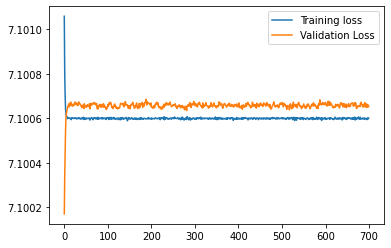

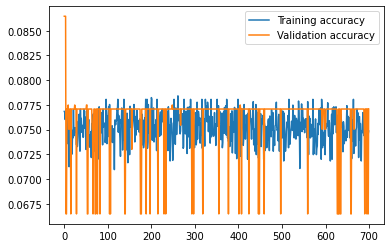

In [65]:
# HINT: note that your training time should not take many days.

# TODO:
# Pick your hyper parameters
max_epoch = 700
train_batch = 32
test_batch = 32
learning_rate = 0.0001

use_gpu = torch.cuda.is_available()

train_dataset, val_dataset, test_dataset, train_labels, val_labels, test_labels = get_dataset("data", 2)
# Create train dataset loader
train_dataset = np.array(train_dataset)
train_labels = np.array(train_labels)
test_dataset = np.array(test_dataset)
test_labels = np.array(test_labels)
val_dataset = np.array(val_dataset)
val_labels = np.array(val_labels)
train_data = CatsDataset(train_dataset, train_labels)
trainloader = DataLoader(train_data, batch_size=train_batch, shuffle=True)
# Create validation dataset loader
valid_data = CatsDataset(val_dataset, val_labels)
val_loader = DataLoader(valid_data, batch_size=test_batch)
# Create test dataset loader
test_data = CatsDataset(test_dataset, test_labels)
testloader = DataLoader(test_data, batch_size=test_batch)

# initialize your network
model = ConvNet()
if use_gpu:
  model.cuda()

# define your loss function
criterion = nn.MSELoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=5e-03) # you can play with  weight_decay as well
    
# start training
# for each epoch calculate validation performance
# save best model according to validation performance

lLoss = 0
FinalLossTrain=[]
FinalLossValid=[]
FinalAccTrain=[]
FinalAccValid=[]
check_for = 0
for epoch in range(max_epoch):
  #print("iteration start: ", check_for)
  ###############################################333
  model=model.train()
  j=0
  
  lossez = np.zeros(train_data.__len__())
  predicteds=[]
  actuals = []
  for batch_idx, (data, labels) in enumerate(trainloader):
    
    if use_gpu:
      data = data.cuda()
    optimizer.zero_grad()
    y_pred = model(data.permute(0, 3, 1, 2))
    #y_pred = torch.max(y_pred)

    one_hot = torch.nn.functional.one_hot(labels.to(torch.int64),13)
    loss  = criterion(y_pred, one_hot.to(torch.float))
    #loss  = criterion(y_pred, labels.unsqueeze(1))

    loss.backward()
    optimizer.step()
    predicted = np.array((y_pred).cpu().detach())
    actual = np.array(labels[:].unsqueeze(1).cpu().detach())
    
    kia = 0
    nahi = 0
    
    for kuch in actual:     
      if actual[kia] == np.argmax(predicted[kia]):
        nahi += 1
      kia += 1
    accuracies = nahi/kia
    losses = np.mean(np.array(loss.cpu().detach()))
    
    for x in predicted:
      predicteds.append(np.argmax(x))
    for x in actual:
      actuals.append(x)
    
    #lossez[j*train_batch:(j+1)*train_batch] = (np.array(criterion(y_pred, labels.unsqueeze(1)).cpu().detach()))
    lossez[j*train_batch:(j+1)*train_batch] = losses
    j=j+1 

  kia = 0
  nahi = 0
  #print(lossez)
  for kuch in actuals:
    if actuals[kia][0] == predicteds[kia]:
      nahi += 1
    kia += 1
  acc = nahi/kia

  #print("iteration end: ", check_for," acc: ", acc*100)
  ########################################################
#    iterate over training batches
#    ...

#    Validation
  model = model.eval()
  criterions = nn.MSELoss()
  lossezV = np.zeros(valid_data.__len__())
  predictedsV=[]
  actualsV = []
  j=0
  with torch.no_grad():
    for batch_idx, (data, labels) in enumerate(val_loader):
      #print(labels)
      y_pred = model(data.permute(0, 3, 1, 2))
      predicted =np.array((y_pred).cpu().detach())
      actual = np.array(labels[:].unsqueeze(1).cpu().detach())
      for x in predicted:
        predictedsV.append(np.argmax(x))
      for x in actual:
        actualsV.append(x)
      

      one_hotV = torch.nn.functional.one_hot(labels.to(torch.int64),13)
      lossV  = criterion(y_pred, one_hotV.to(torch.float))
      lossesV = np.mean(np.array(lossV.cpu().detach()))
      lossezV[j*train_batch:(j+1)*train_batch] = lossesV

      #lossezV[j*train_batch:(j+1)*train_batch] = (np.array(criterion(y_pred, labels.unsqueeze(1)).cpu().detach()))
      j=j+1   
      kia = 0
      nahi = 0
      
      for kuch in actual:
        if actual[kia] == np.argmax(predicted[kia]):
          nahi += 1
        kia += 1
      accuracies = nahi/kia
    
    kia = 0
    nahi = 0
    
    for kuch in actualsV:
      if actualsV[kia][0] == predictedsV[kia]:
        nahi += 1
      kia += 1
    accV = nahi/kia

  FinalLossTrain.append(np.mean(lossez)*100)
  FinalLossValid.append(np.mean(lossezV)*100)
  FinalAccTrain.append(acc)
  FinalAccValid.append(accV)
#     iterate over validation batches
  if accV > lLoss:
    torch.save(model, 'best_path_cnn_Adam.pth')
    lLoss = accV

  
  #print("iteration end: ", check_for," accV: ", accV*100)
  check_for += 1
# plot losses vs epoch 
# ...
# plt.show()
plt.figure()
plt.plot(FinalLossTrain, label='train loss')
plt.plot(FinalLossValid, label='validation loss')
plt.legend(['Training loss', 'Validation Loss'],fontsize=10)
#print(FinalLossTrain)
#print(FinalLossValid)
# plot accuracies vs epoch
# ...
# plt.show()
plt.figure()
plt.plot(FinalAccTrain, label='train acc')
plt.plot(FinalAccValid, label='validation acc')
plt.legend(['Training accuracy', 'Validation accuracy'],fontsize=10)

# for epoch in range(max_epoch):
#    model=model.train()
#    iterate over training batches
#    ...

#    Validation
#    model = model.eval()
#    with torch.no_grad():
#     iterate over validation batches
#    if ???????:
#       torch.save(model, best_path)

# plot losses vs epoch 
# ...
# plt.show()

# plot accuracies vs epoch
# ...
# plt.show()


####Test with ADAM [15 pts.]

Report the following for your best model on your test set which has not been seen by the model yet.
1. A heatmap for confusion matrix
2. Accuracy
3. Macro Precision
4. Macro Recall
5. F1 Score

Then, discuss figures that you have plotted in the previous section, your test results and algorithm complexity with maximum 200 words. Compare two **optimizers**. Which one is more preferable? Why?

We observe that the plots show very abrupt changes. This might be due to high learning rate. For loss functions in MLP we see that we have some sudden peaks while in CNN we have ralatively straight lines for loss functions. Accuracies for both models change very abtuptly without showing much of a pattern. Therefore it seems like SGD optimizer is working better as compared to ADAM. Now discussing the results we see that for all of the metrics i-e accuracy, presicion, recall and F1 score, MLP model is performing better as compared to CNN model. However when we see confusion matrix we see that the predictions of CNN model are more scattered as compared to MLP model. Moreover CNN takes more time for execution as compared to MLP training. For optimizers as discussed earlier SGD seems to work better.

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Mean Loss: 0.07153872164625154 
Mean Acc: 9.194699286442406 
Mean Macro Precision: 1.411809898279524 
Mean Macro Recall: 9.091371766685523 
Mean Macro F1 Score: 2.4435024435024433


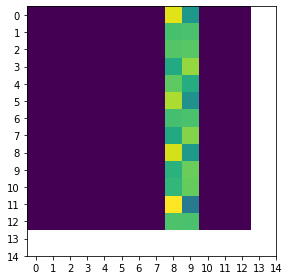

In [71]:
# Test MLP
# load best model
best_path = "best_path_Adam.pth"
model = torch.load(best_path)

# evaluate on test set
model = model.eval()

criterions = nn.MSELoss()
lossezZ = np.zeros(test_data.__len__())
predictedsZ=[]
actualsZ = []
j=0
with torch.no_grad():
  for batch_idx, (data, labels) in enumerate(testloader):
    #print(labels)
    y_pred = (model(data))
    predicted =np.array((y_pred).cpu().detach())
    actual = np.array(labels[:].unsqueeze(1).cpu().detach())
    for x in predicted:
      predictedsZ.append(np.argmax(x))
    for x in actual:
      actualsZ.append(x)
    
    #lossezZ.append(np.array(criterions(y_pred, labels.unsqueeze(1)).cpu().detach()))
    one_hotZ = torch.nn.functional.one_hot(labels.to(torch.int64),13)
    lossZ  = criterion(y_pred, one_hotZ.to(torch.float))
    lossesZ = np.mean(np.array(lossZ.cpu().detach()))
    lossezZ[j*train_batch:(j+1)*train_batch] = lossesZ
    j=j+1   
    kia = 0
    nahi = 0
    
    for kuch in actual:
      if actual[kia] == np.argmax(predicted[kia]):
        nahi += 1
      kia += 1
    accuracies = nahi/kia
  
  kia = 0
  nahi = 0
  
  for kuch in actualsZ:
    if actualsZ[kia][0] == predictedsZ[kia]:
      nahi += 1
    kia += 1
  accZ = nahi/kia

  
  conf_matrix = (confusion_matrix(actualsZ, predictedsZ))
  acc = accuracy_score(actualsZ, predictedsZ) *100
  pre = precision_score(actualsZ, predictedsZ,average='macro') *100
  recall = recall_score(actualsZ, predictedsZ,average='macro') *100
  f1 = f1_score(actualsZ, predictedsZ,average='macro') *100
  lossesd = np.mean(lossezZ)
  #print(metrics.classification_report(actualsZ, predictedsZ, digits=3))
  # print("confusion matrix: ",dd)
  # print("f1 score: ",f1_score(actualsZ, predictedsZ,average='macro') *100) 
  # print("macro prescion: ",precision_score(actualsZ, predictedsZ,average='macro') *100)
  # print("macro recall: ",recall_score(actualsZ, predictedsZ,average='macro') *100)
  # print("accuracy: ",accuracy_score(actualsZ, predictedsZ) *100)
  #print("nahi",nahi)
  #print("loader len",val_loader.__len__())
  #print("act",actualsV)
  #print("pre",predictedsV)
  
#   iterate over test batches
#   get confusion matrix
#   calculate accuracy
#   calculate precision
#   calculate recall
#   calculate F1 score

# print metrics
print("Mean Loss:", lossesd, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
# We want to show all ticks...
ax.set_xticks(np.arange(15))
ax.set_yticks(np.arange(15))

fig.tight_layout()
plt.show()

Mean Loss: 0.0710065626542138 
Mean Acc: 7.543323139653414 
Mean Macro Precision: 0.5802556261271857 
Mean Macro Recall: 7.6923076923076925 
Mean Macro F1 Score: 1.0791104629967188


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


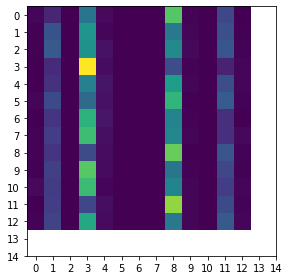

In [66]:
# Test CNN
# load best model
best_path = "best_path_cnn_Adam.pth"
model = torch.load(best_path)

# evaluate on test set
# model = model.eval()
model = model.eval()

criterions = nn.MSELoss()
lossezZZ = np.zeros(test_data.__len__())
predictedsZZ=[]
actualsZZ = []
j=0
with torch.no_grad():
  for batch_idx, (data, labels) in enumerate(testloader):
    #print(labels)
    y_pred = model(data.permute(0, 3, 1, 2))
    predicted =np.array((y_pred).cpu().detach())
    actual = np.array(labels[:].unsqueeze(1).cpu().detach())
    for x in predicted:
      predictedsZZ.append(np.argmax(x))
    for x in actual:
      actualsZZ.append(x)
    #print("y_p: ",y_pred.cpu().detach())
    #print("predicted: ",predicted)
    
    # print(criterions(y_pred, labels.unsqueeze(1)))
    
    #lossezZZ.append(np.array(criterions(y_pred, labels.unsqueeze(1)).cpu().detach()))
    one_hotZZ = torch.nn.functional.one_hot(labels.to(torch.int64),13)
    lossZZ  = criterion(y_pred, one_hotZZ.to(torch.float))
    lossesZZ = np.mean(np.array(lossZZ.cpu().detach()))
    lossezZZ[j*train_batch:(j+1)*train_batch] = lossesZZ
    
    j=j+1   
    kia = 0
    nahi = 0
    
    for kuch in actual:
      if actual[kia] == np.argmax(predicted[kia]):
        nahi += 1
      kia += 1
    accuracies = nahi/kia
  
  kia = 0
  nahi = 0
  
  for kuch in actualsZZ:
    if actualsZZ[kia][0] == predictedsZZ[kia]:
      #print("act: ",actualsV[kia][0])
      #print("pre: ",predictedsV[kia][0])
      nahi += 1
    #print("-----------------")
    kia += 1
  accZZ = nahi/kia
  #print("accuracy ",accZZ*100)
  dd = (confusion_matrix(actualsZZ, predictedsZZ))
  acc = accuracy_score(actualsZZ, predictedsZZ) *100
  pre = precision_score(actualsZZ, predictedsZZ,average='macro') *100
  recall = recall_score(actualsZZ, predictedsZZ,average='macro') *100
  f1 = f1_score(actualsZZ, predictedsZZ,average='macro') *100
  lossesd = np.mean(lossezZZ)
  # print(metrics.classification_report(actualsZ, predictedsZ, digits=3))
  # print("confusion matrix: ",dd)
  # print("f1 score: ",f1_score(actualsZ, predictedsZ,average='macro') *100) 
  # print("macro prescion: ",precision_score(actualsZ, predictedsZ,average='macro') *100)
  # print("macro recall: ",recall_score(actualsZ, predictedsZ,average='macro') *100)
  # print("accuracy: ",accuracy_score(actualsZ, predictedsZ) *100)
#   iterate over test batches
#   get confusion matrix
#   calculate accuracy
#   calculate precision
#   calculate recall
#   calculate F1 score

# print metrics
print("Mean Loss:", lossesd, "\nMean Acc:", acc,"\nMean Macro Precision:", pre, "\nMean Macro Recall:", recall, "\nMean Macro F1 Score:", f1) 

# plot confusion matrix
fig, ax = plt.subplots()
im = ax.imshow(conf_matrix)
#We want to show all ticks...
ax.set_xticks(np.arange(15))
ax.set_yticks(np.arange(15))

fig.tight_layout()
plt.show()